# TicTacToe
### An implementation of the game TicTacToe with AI opponent
This is an implementation of the simple grid-based game known as TicTacToe. Additionally, a simple AI has been created which can serve as a worthy opponent!

On its turn, the AI simulates playing many games with itself from the current state of the game and chooses its simulated moves based on a random policy. There are three outcomes from a simulation: 

- The AI wins against itself (+1)
- The AI loses against itself (-1)
- The AI draws against itself (±0)

Once the simulation is complete, the outcome of the game is stored with the corresponding first move in the simulation. This is repeated N times, resulting in an estimated potential for each move in the current state. 

For example, consider the board state where the AI is X and its opponent is O

 |	X	 |	O	 |	O	|
 ---------------------------------------------------
 |	O	 |	O	 |	X	|
 ---------------------------------------------------
 |	X	 |	--  |	--	|
  ---------------------------------------------------
  
  
The AI has two options, it can either place a X in the middle-bottom square or the last-bottom square. By simulating many games and randomly trying both moves, it will discover that it will lose in 100% of simulated games if it places an X in the last-bottom square. This will result in a very negative reward for the AI if it were to place its piece in the last-bottom square and a reward of 0 otherwise (because it will draw every time). Therefore, once the games have been simulated and it has figured out the potential reward of each move, it will choose a move that that maximises its potential reward (middle-bottom).

### Performance of the AI as the number of simulations increase

Essentially, the AI is estimating the probability of the next action leading to a win, given the current game state. As a result, the larger the number of simulations, the more accurate the estimates, and the less likely the agent is to lose.

This can be demonstrated by playing many games against an opponent with varying number of simulations. In this case, the opponent will choose its actions at random.

In [1]:
from tictactoe import TicTacToe, Agent

# Instantiate the TicTacToe board
board = TicTacToe()

# Used to store the win rate
win_ratios = []

# A list of simulations to be tested
difficulties = range(1, 200, 10)

# The number of games to play
number_of_games = 1000

# For each amount of simulations
for difficulty in difficulties:
    
    # Instantiate the AI with a number of simulations
    agent = Agent(difficulty=difficulty)
    
    # Play many games
    for i in range(number_of_games):
        
        # Automatically plays game against random opponent
        reward = board.computer_play_game(agent)

        # Record wins, losses, and draws.
        if reward == -1:
            agent.wins += 1

        elif reward == 1:
            agent.losses += 1

        else:
            agent.draws += 1
    
    print("Difficulty: %d -> Wins: %d, Losses: %d, Draws: %d" % (difficulty, agent.wins, agent.losses, agent.draws))
    win_ratios.append(agent.wins / (agent.wins + agent.losses + agent.draws))

Difficulty: 1 -> Wins: 415, Losses: 441, Draws: 144
Difficulty: 11 -> Wins: 796, Losses: 116, Draws: 88
Difficulty: 21 -> Wins: 835, Losses: 96, Draws: 69
Difficulty: 31 -> Wins: 856, Losses: 88, Draws: 56
Difficulty: 41 -> Wins: 894, Losses: 53, Draws: 53
Difficulty: 51 -> Wins: 874, Losses: 64, Draws: 62
Difficulty: 61 -> Wins: 890, Losses: 56, Draws: 54
Difficulty: 71 -> Wins: 894, Losses: 59, Draws: 47
Difficulty: 81 -> Wins: 891, Losses: 44, Draws: 65
Difficulty: 91 -> Wins: 898, Losses: 56, Draws: 46
Difficulty: 101 -> Wins: 907, Losses: 40, Draws: 53
Difficulty: 111 -> Wins: 917, Losses: 35, Draws: 48
Difficulty: 121 -> Wins: 913, Losses: 37, Draws: 50
Difficulty: 131 -> Wins: 907, Losses: 49, Draws: 44
Difficulty: 141 -> Wins: 926, Losses: 30, Draws: 44
Difficulty: 151 -> Wins: 917, Losses: 35, Draws: 48
Difficulty: 161 -> Wins: 940, Losses: 29, Draws: 31
Difficulty: 171 -> Wins: 911, Losses: 35, Draws: 54
Difficulty: 181 -> Wins: 910, Losses: 38, Draws: 52
Difficulty: 191 -> W

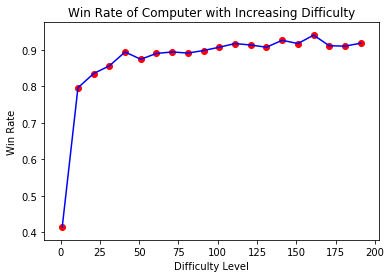

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel('Difficulty Level')
plt.ylabel('Win Rate')
plt.title('Win Rate of Computer with Increasing Difficulty')
plt.plot(difficulties, win_ratios, color='blue')
plt.scatter(difficulties, win_ratios, color='red')
plt.show()

As can be seen in the graph above, the performance (win rate) of the AI drastically increases as the number of simulations (difficulty) increases and quickly plateaus towards a win-rate of near one. 

Even though the performance is measured against an opponent with a random policy, it is not limited to performing well against random agents. It becomes evident once playing a few games again the AI that it is almost impossible to win against when its difficulty level exceeds 150.

In [15]:
%matplotlib inline
from tictactoe import TicTacToe, Agent

# Instantiate the TicTacToe board
board = TicTacToe()

# Instantiate the AI with a difficulty level.
agent = Agent(difficulty=500)

# Play TicTacToe!
board.play_game(agent)

GAME STARTED: Difficulty Level = 500
Computer played position: (1, 1)


 |		 |		 |		|
---------------------------------------------------
 |		 |	O	 |		|
---------------------------------------------------
 |		 |		 |		|


Actions to choose from: [1 - 9]
Enter a move: 1
You played position: (0, 0)
 |	X	 |		 |		|
---------------------------------------------------
 |		 |	O	 |		|
---------------------------------------------------
 |		 |		 |		|
Computer played position: (0, 1)


 |	X	 |	O	 |		|
---------------------------------------------------
 |		 |	O	 |		|
---------------------------------------------------
 |		 |		 |		|


Actions to choose from: [1 - 9]
Enter a move: 8
You played position: (2, 1)
 |	X	 |	O	 |		|
---------------------------------------------------
 |		 |	O	 |		|
---------------------------------------------------
 |		 |	X	 |		|
Computer played position: (2, 0)


 |	X	 |	O	 |		|
---------------------------------------------------
 |		 |	O	 |		|
-------------------------

### Insight into the workings of the AI
We can get a bit of insight on how the AI 'thinks' by observing the values it stores in each game state after 
performing the simulations. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def plot_grid(grids, stage):
    grid = grids[stage]
    probs = np.round(grid/grid.sum(), 3)
    for (j,i),label in np.ndenumerate(probs):
        plt.text(i,j,label,ha='center',va='center', color='black', fontsize='20')

    plt.imshow(grid, cmap='summer')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In the game above, the AI had the first move. From running many simulation, it found that the most promising move that leads to a win the majority of the time against a random agent is the centre square (22%). 

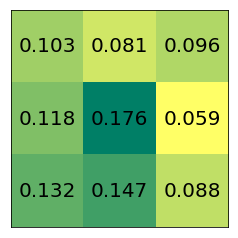

In [17]:
plot_grid(agent.grids, 0)

The following moves work in a similar fashion, each move being associated with its probability of leading to a win.

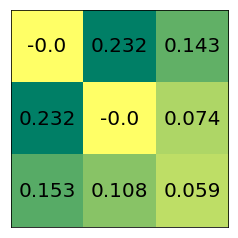

In [18]:
plot_grid(agent.grids, 1)

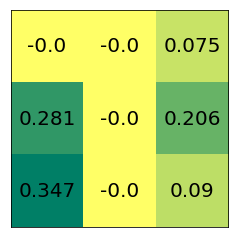

In [19]:
plot_grid(agent.grids, 2)

The last choice that the AI makes have very similar probabilities. This is because both of these moves can only lead to a win if the player messes up his last move. 

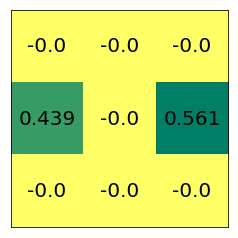

In [20]:
plot_grid(agent.grids, 3)